In [19]:
import numpy as np
from sklearn.datasets import make_circles
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from sklearn.preprocessing import PolynomialFeatures

# Kernel Functions

_Idea_: Apply a transformation $\phi$ to $x$ such that it becomes $\phi(x)$ which results in a higher dimensional space

The implementation of the transformations below are obviously not the actual kernel trick, but rather to visualize the idea behind the kernel trick when implementing

In [20]:
X, y = make_circles(factor = 0.5, random_state = 42, noise = 0.05)

<AxesSubplot:>

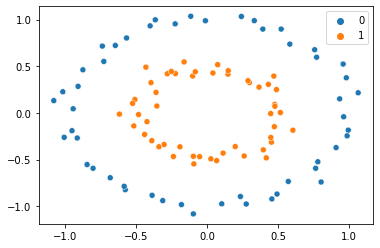

In [21]:
sns.scatterplot(x = X[:, 0], y = X[:, 1], hue = y)

### Radial Basis Function

In [22]:
# The idea behind the RBF
rbf = np.exp(-(X**2).sum(1))

In [ ]:
fig = go.Figure(data = [go.Scatter3d(x = X[:, 0], y = X[:, 1], z = rbf,
                                     mode = 'markers',
                                     marker = dict(color = y, 
                                                   colorscale = 'Viridis',
                                                  opacity = 0.8))])
fig.show()

### Quadratic Kernel

In [24]:
q = X[:, 0]**2
p = X[:, 1]**2
inner = 2*p*q
qp = np.sqrt(inner)

In [ ]:
fig = go.Figure(data = [go.Scatter3d(x = X[:, 0], y = X[:, 1], z = qp,
                                     mode = 'markers',
                                     marker = dict(color = y, 
                                                   colorscale = 'Viridis',
                                                  opacity = 0.6))])
fig.show()

### Polynomial Kernel

In [27]:
# Create a polynomial interaction term
poly_interaction = PolynomialFeatures(degree = 2, include_bias = False)

# Create the transformation
poly_feat = poly_interaction.fit_transform(X)

In [75]:
third = np.array(poly_feat[:, 2:5].reshape(1, -1))[0]

(300,)

In [ ]:
fig = go.Figure(data = [go.Scatter3d(x = poly_feat[:, 0], y = poly_feat[:, 1], z = third,
                                    mode = 'markers',
                                    marker = dict(color = y,
                                                  colorscale = 'Viridis',
                                                  opacity = 0.6))])
fig.show()